# Performance of LeNet-5

In [1]:

% matplotlib inline

import os
import matplotlib.pyplot as plt

from scripts.utils import ExpResults

In [2]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'xx-large',
                  'figure.figsize': (7, 6),
                  'savefig.dpi': 300,
                  'savefig.format': 'jpg'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

## Parameters and definitions

In [8]:
log_dir = '/home/rbodo/.snntoolbox/data/mnist/cnn/lenet5/keras/32bit/log'
runlabel_analog = '08'
path_analog = os.path.join(log_dir, 'gui', runlabel_analog)

In [11]:
exp_analog = ExpResults(path_analog, '', '.')
experiments = [exp_analog]

## Plot error vs operations

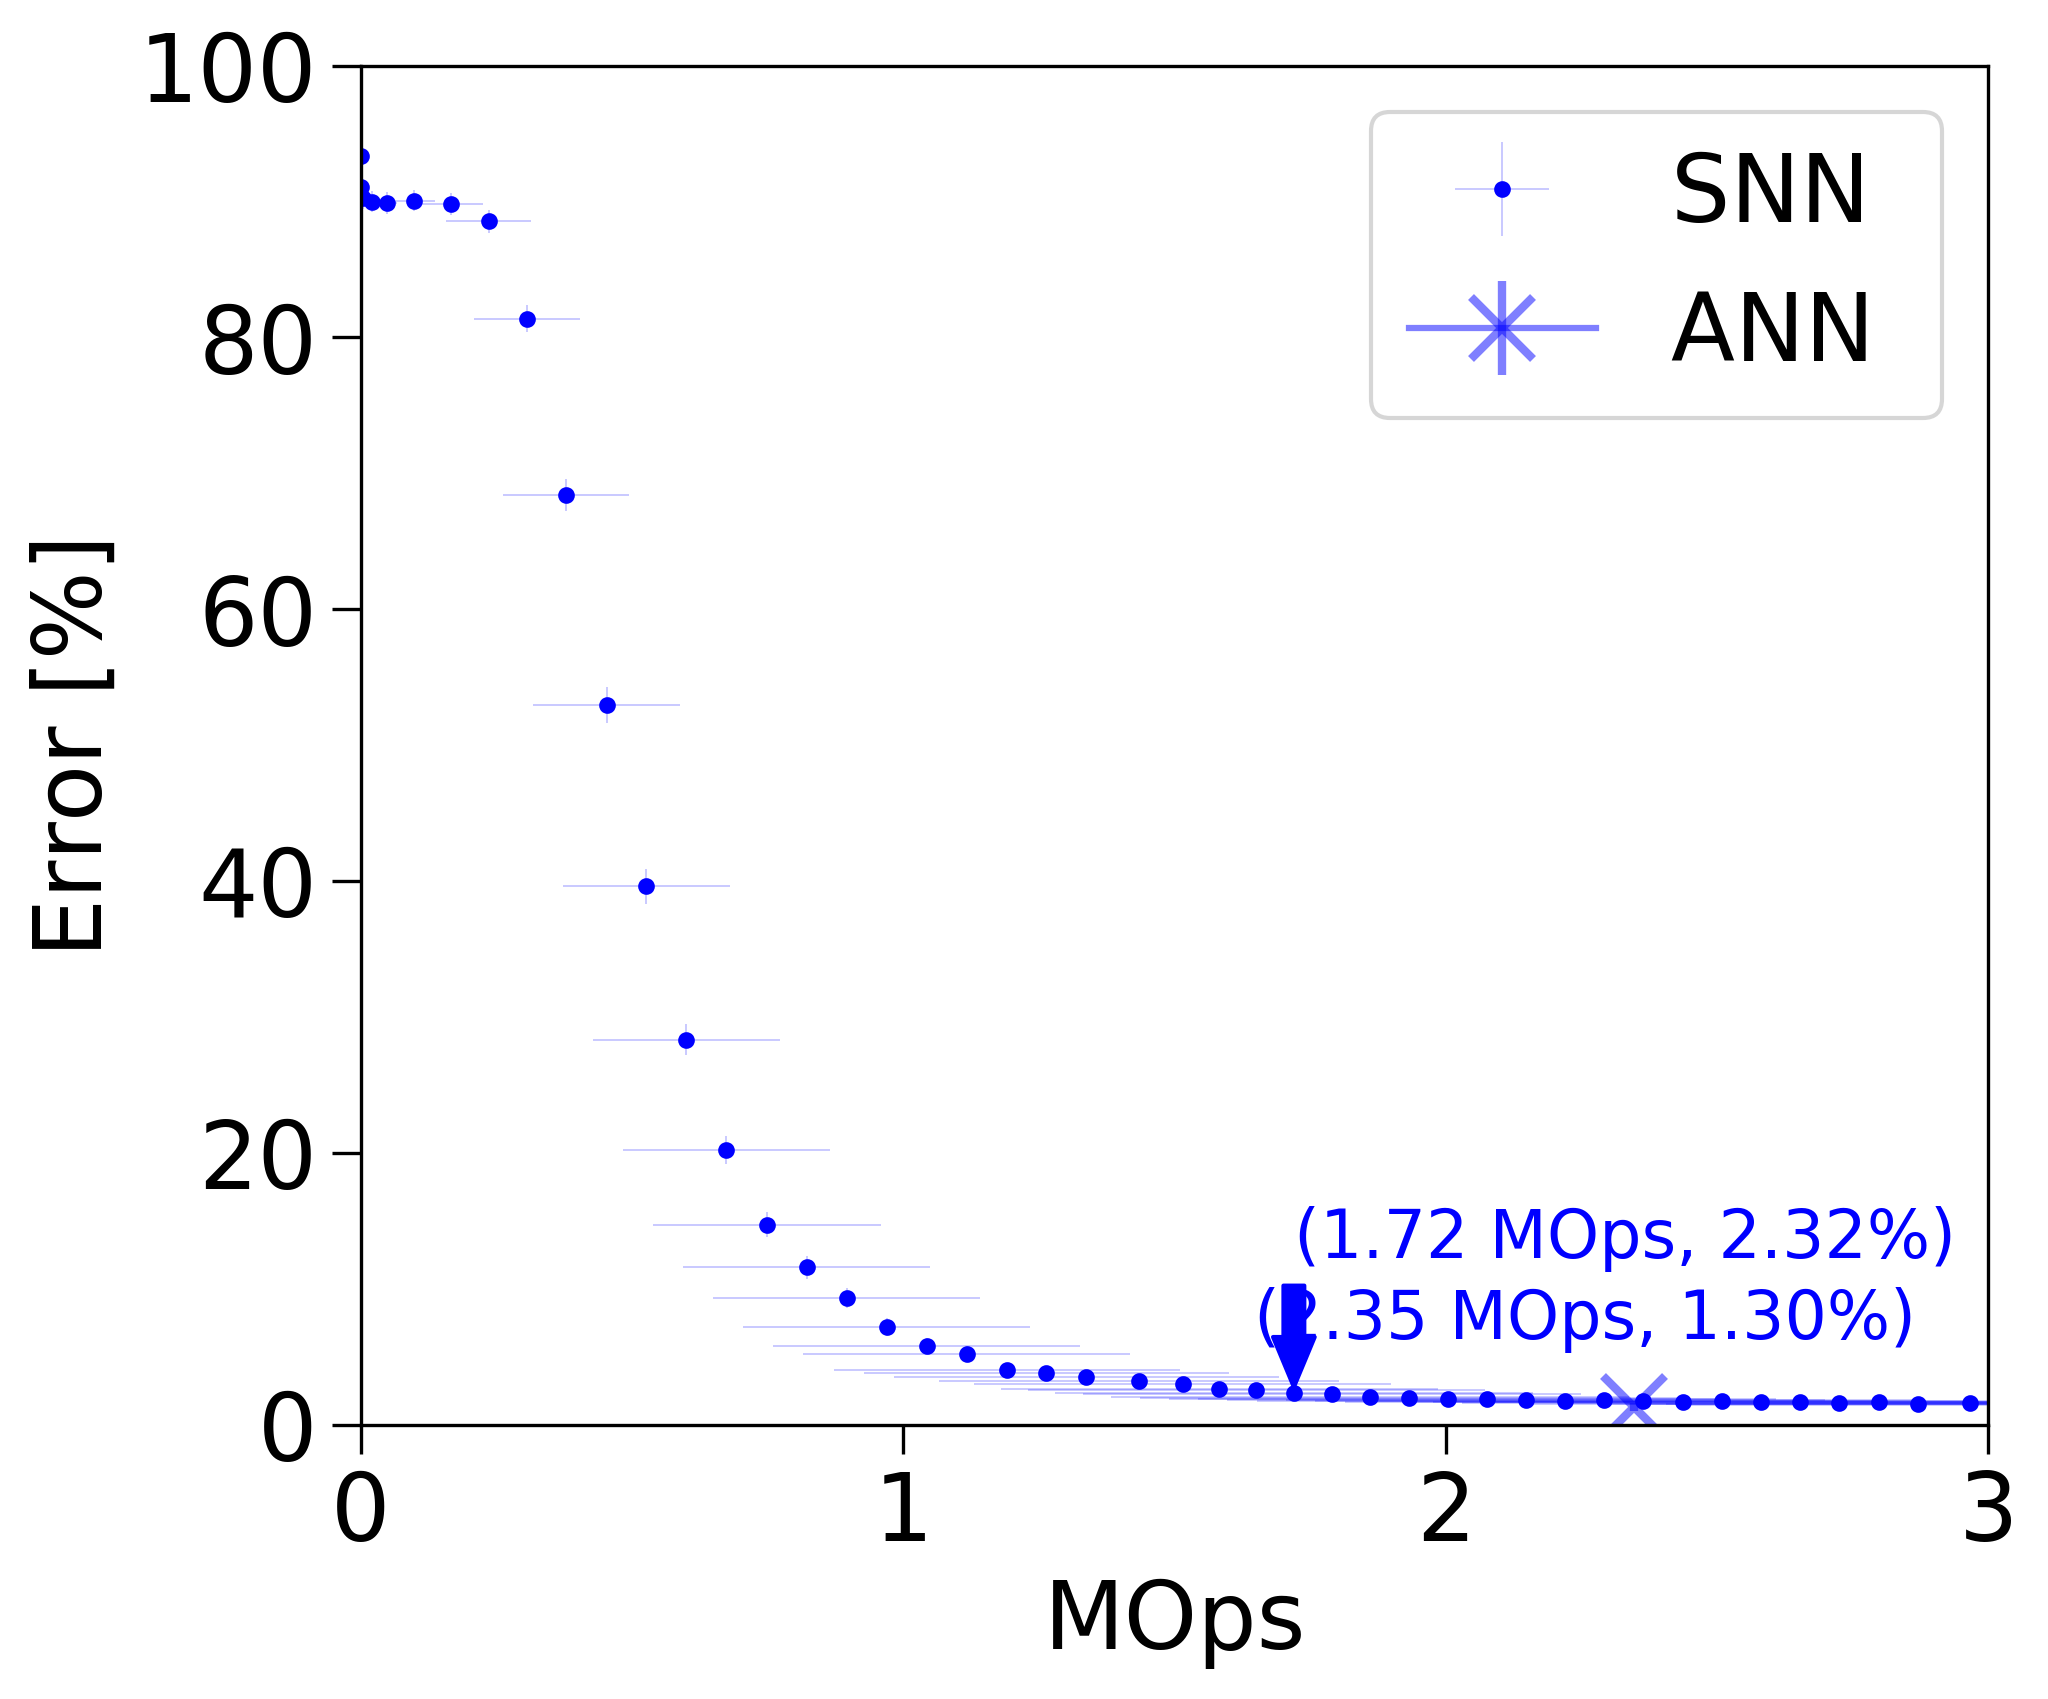

In [12]:
show_numbers = True

exp = experiments[0]

plt.errorbar(exp.mean_computations_t, exp.e1_mean, xerr=exp.std_computations_t,
             yerr=exp.e1_confidence95, fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)

plt.errorbar(exp.operations_ann, exp.e1_ann, marker='x', label='ANN '+exp.label, color=exp.color1, markersize=15,
             yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)

if show_numbers:
    plt.annotate('({:.2f} MOps, {:.2f}%)'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.7, exp.e1_ann + 5), fontsize=16, color=exp.color1)
    plt.annotate('({:.2f} MOps, {:.2f}%)'.format(exp.op1_1, exp.e1_1), xy=(exp.op1_1, exp.e1_1),
                 xytext=(exp.op1_1, exp.e1_1 + 10), fontsize=16,
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

plt.ylim(0, 100)
plt.xlim(0, 3)
plt.ylabel('Error [%]')
plt.xlabel('MOps')
plt.legend(loc='upper right')
# plt.title('ANN vs SNN performance')
plt.savefig(os.path.join(log_dir, 'err_vs_ops'), bbox_inches='tight')

In [6]:
for exp in experiments:
    print(exp.label)
    print('ANN top-1:                         ({:.5f} MOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e1_ann))
    print('SNN top-1 best error:         ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_0, exp.e1_0))
    print('SNN top-1 converged:        ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_1, exp.e1_1))
    print('SNN top-1 jointly optimal:  ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_optimal, exp.e1_optimal))
    print('SNN top-1 same op:           ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_2, exp.e1_2))
    print('')


ANN top-1:                         (2.34673 MOps/frame, 1.04 %)
SNN top-1 best error:         (5.63499 MOps/frame, 0.99 %)
SNN top-1 converged:        (1.77416 MOps/frame, 1.90 %)
SNN top-1 jointly optimal:  (0.92824 MOps/frame, 8.82 %)
SNN top-1 same op:           (2.32114 MOps/frame, 1.48 %)

